# Final Project: Exploring and Predicting with a Real Dataset

## Author: Matthew Anacleto

Original Dataset: https://www.kaggle.com/datasets/joebeachcapital/diamonds/data

# Diamonds Dataset Description

1. **Carat** is a measure of diamond weight. One carat is equivalent to 0.2 grams.

2. **Clarity** refers to how clear a diamond is. Diamonds often contain imperfections like cracks or mineral deposits. The fewer and less noticeable a diamond’s imperfections, the better its clarity. clarity contains 8 ordered levels, from “I1” (the worst) to “IF” (the best).

3. **Color** refers to the color of the diamond. Colorless diamonds are considered better than diamonds with a yellow tint. The dataset contains diamonds of 7 different colors, represented by different letters. “D” - “F” diamonds are considered colorless, while “G” - “J” diamonds have a very faint color.

4. **Cut** refers to how a rough diamond is shaped into a finished diamond. Better cuts create more symmetrical and luminous diamonds. cut has 5 ordered levels: “Fair,” “Good,” “Very Good,” “Premium,” “Ideal.”

5. **x, y, z, depth, and table** are various measures of a diamond’s size, in millimeters.

6. **Price** refers to the cost of the diamond in dollars.

# Step 1: Look at the Big Picture and Frame the Problem

### Frame the Problem:
1. This is a supervised learning environment as training examples are labeled.
2. A regression task will be necessary to predict a value (price).
3. The dataset is an example of batch learning 
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

### Look at the Big Picture:
By examining the properties and quality of a new diamond, the program should be able to produce a predicted price value. Vendors and clients alike will use the information to get an idea of the relationship between a diamond's price and its qualities.

# Step 2: Load the Dataset and Libraries

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset from raw github file
dataset_url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv'

# Use pandas to read the dataset directly from the URL
df = pd.read_csv(dataset_url, sep=',')

# Step 3: Look at the Data Structure

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Step 4: Convert Categorical Attributes to Numerical
The attributes 'color', 'cut', and 'clarity' are currently categorical data entries. However, these categories are not disjoint descriptors, rather they describe a scale from low to high. Therefore, we can convert the alphanumeric codes into a corresponding integer scale.

In [6]:
# convert color column from char to integer
# scale of 1-7 where 1 = J very yellow and poor, 7 = D colorless and ideal

df["color"].value_counts().sort_index(ascending=False)

color
J     2808
I     5422
H     8304
G    11292
F     9542
E     9797
D     6775
Name: count, dtype: int64

In [7]:
# Define a mapping dictionary
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D':7}

# Use the map function to apply the mapping
df['color'] = df['color'].map(color_mapping)

In [8]:
# Now, the 'color' column contains integers instead of strings
df["color"].value_counts().sort_index()

color
1     2808
2     5422
3     8304
4    11292
5     9542
6     9797
7     6775
Name: count, dtype: int64

In [9]:
# convert cut column from string to integer
# scale of 1-5 where 1 = fair, 2 = good, 3 = very good, 4 = premium, 5 = ideal

df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [10]:
# Define a mapping dictionary
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}

# Use the map function to apply the mapping
df['cut'] = df['cut'].map(cut_mapping)

In [11]:
# Now, the 'cut' column contains integers instead of strings
df["cut"].value_counts().sort_index(ascending=False)

cut
5    21551
4    13791
3    12082
2     4906
1     1610
Name: count, dtype: int64

In [12]:
# convert clarity column from string to integer
# scale of 1-8 where 1 is worst and 8 is best

df["clarity"].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [13]:
# Define a mapping dictionary
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1":7, "IF": 8}

# Use the map function to apply the mapping
df['clarity'] = df['clarity'].map(clarity_mapping)

In [14]:
# Now, the 'clarity' column contains integers instead of strings
df["clarity"].value_counts().sort_index()

clarity
1      741
2     9194
3    13065
4    12258
5     8171
6     5066
7     3655
8     1790
Name: count, dtype: int64

In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


# Step 5: Visualize Data with Graphs

## 5.1 Plot with a Histogram

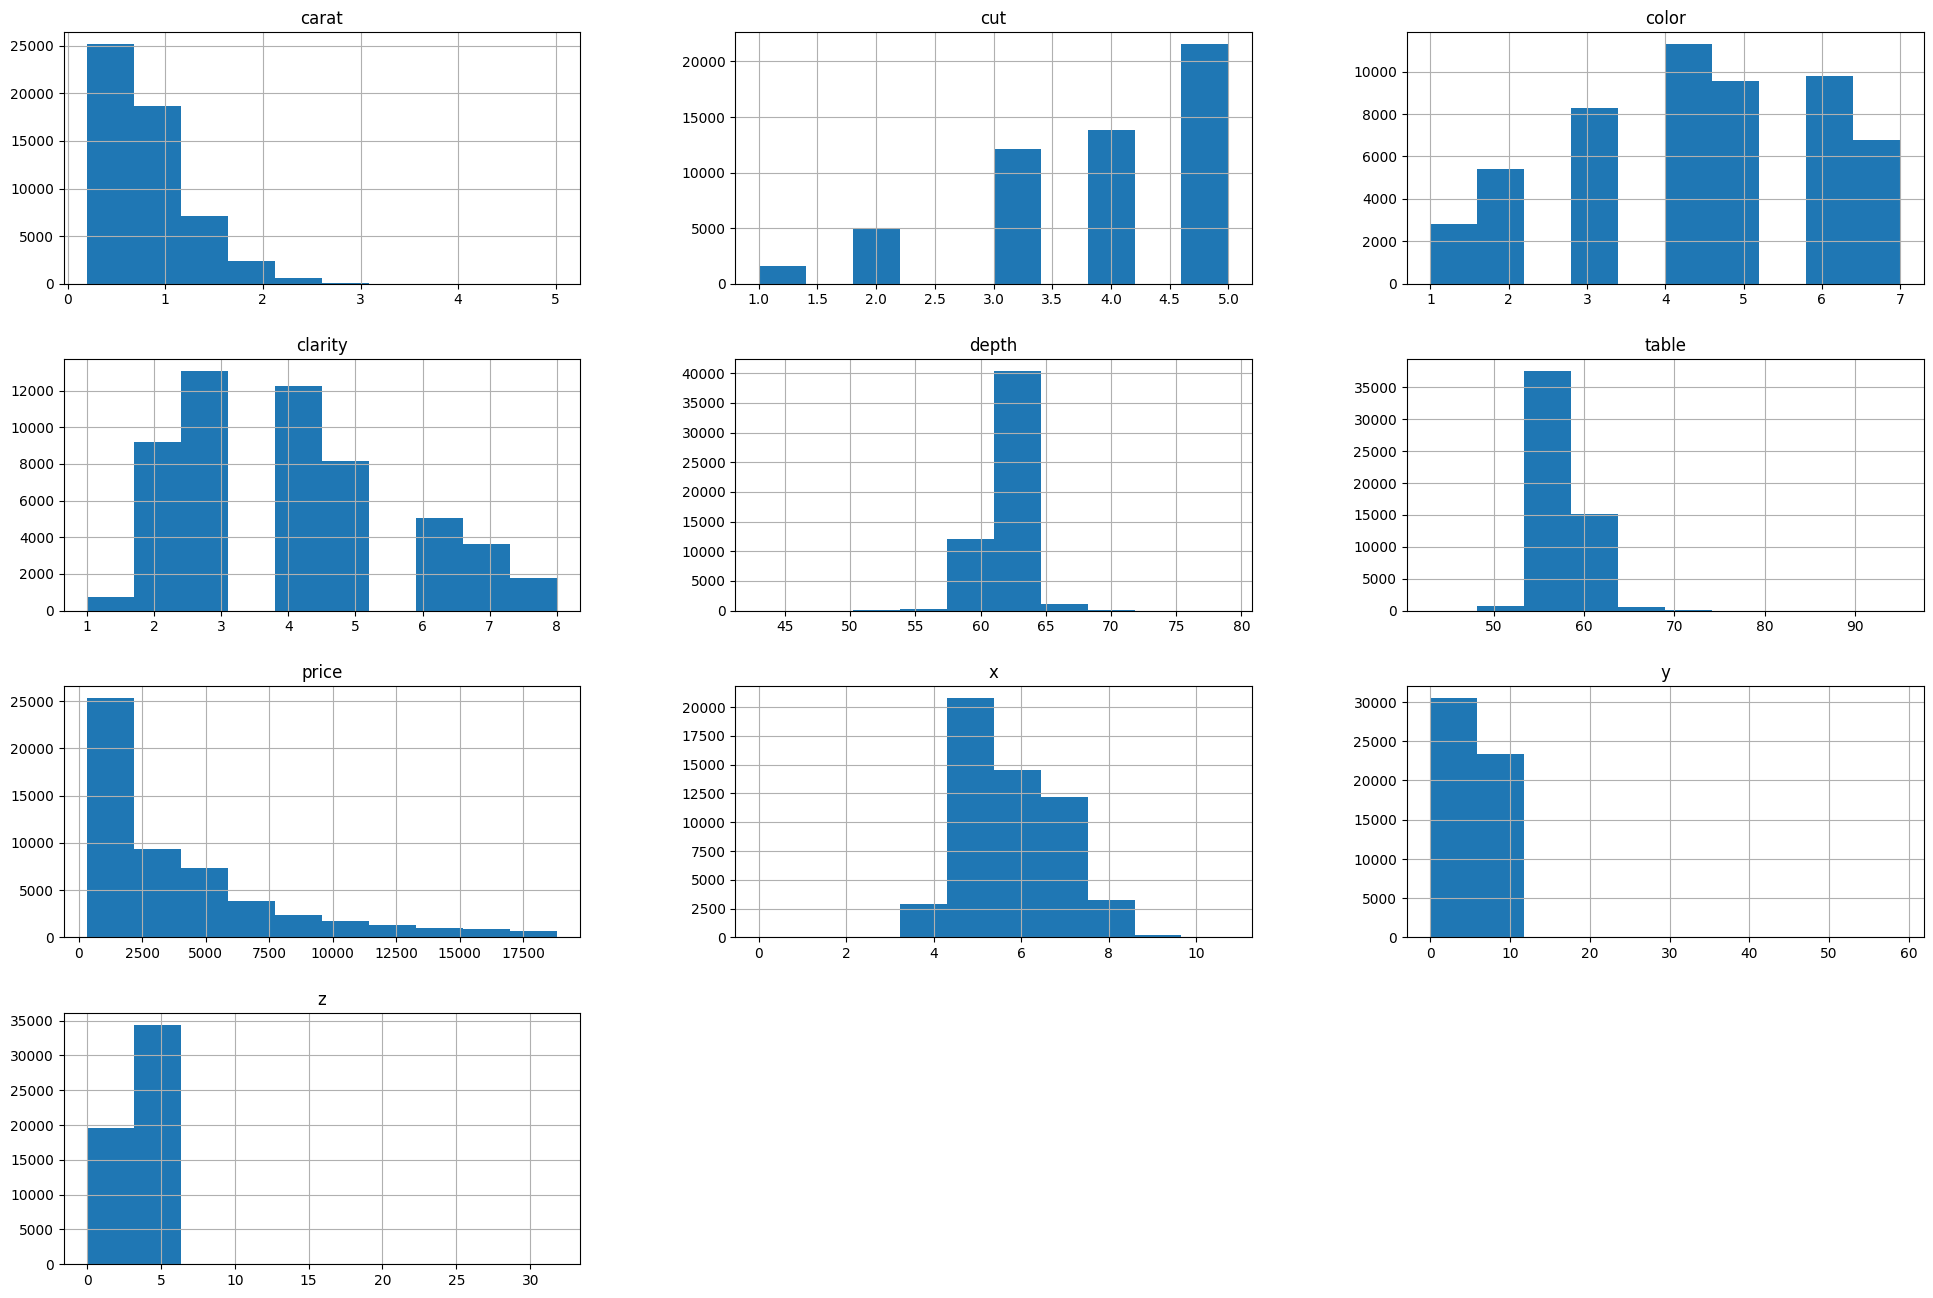

In [16]:
df.hist(figsize=(24, 16))
plt.show()

## 5.2 Look for Correlations between Features

In [17]:
# view entire correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [18]:
# view correlations with regard to target
corr_matrix["price"].sort_values(ascending=False)

price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
table      0.127134
depth     -0.010647
cut       -0.053491
clarity   -0.146800
color     -0.172511
Name: price, dtype: float64

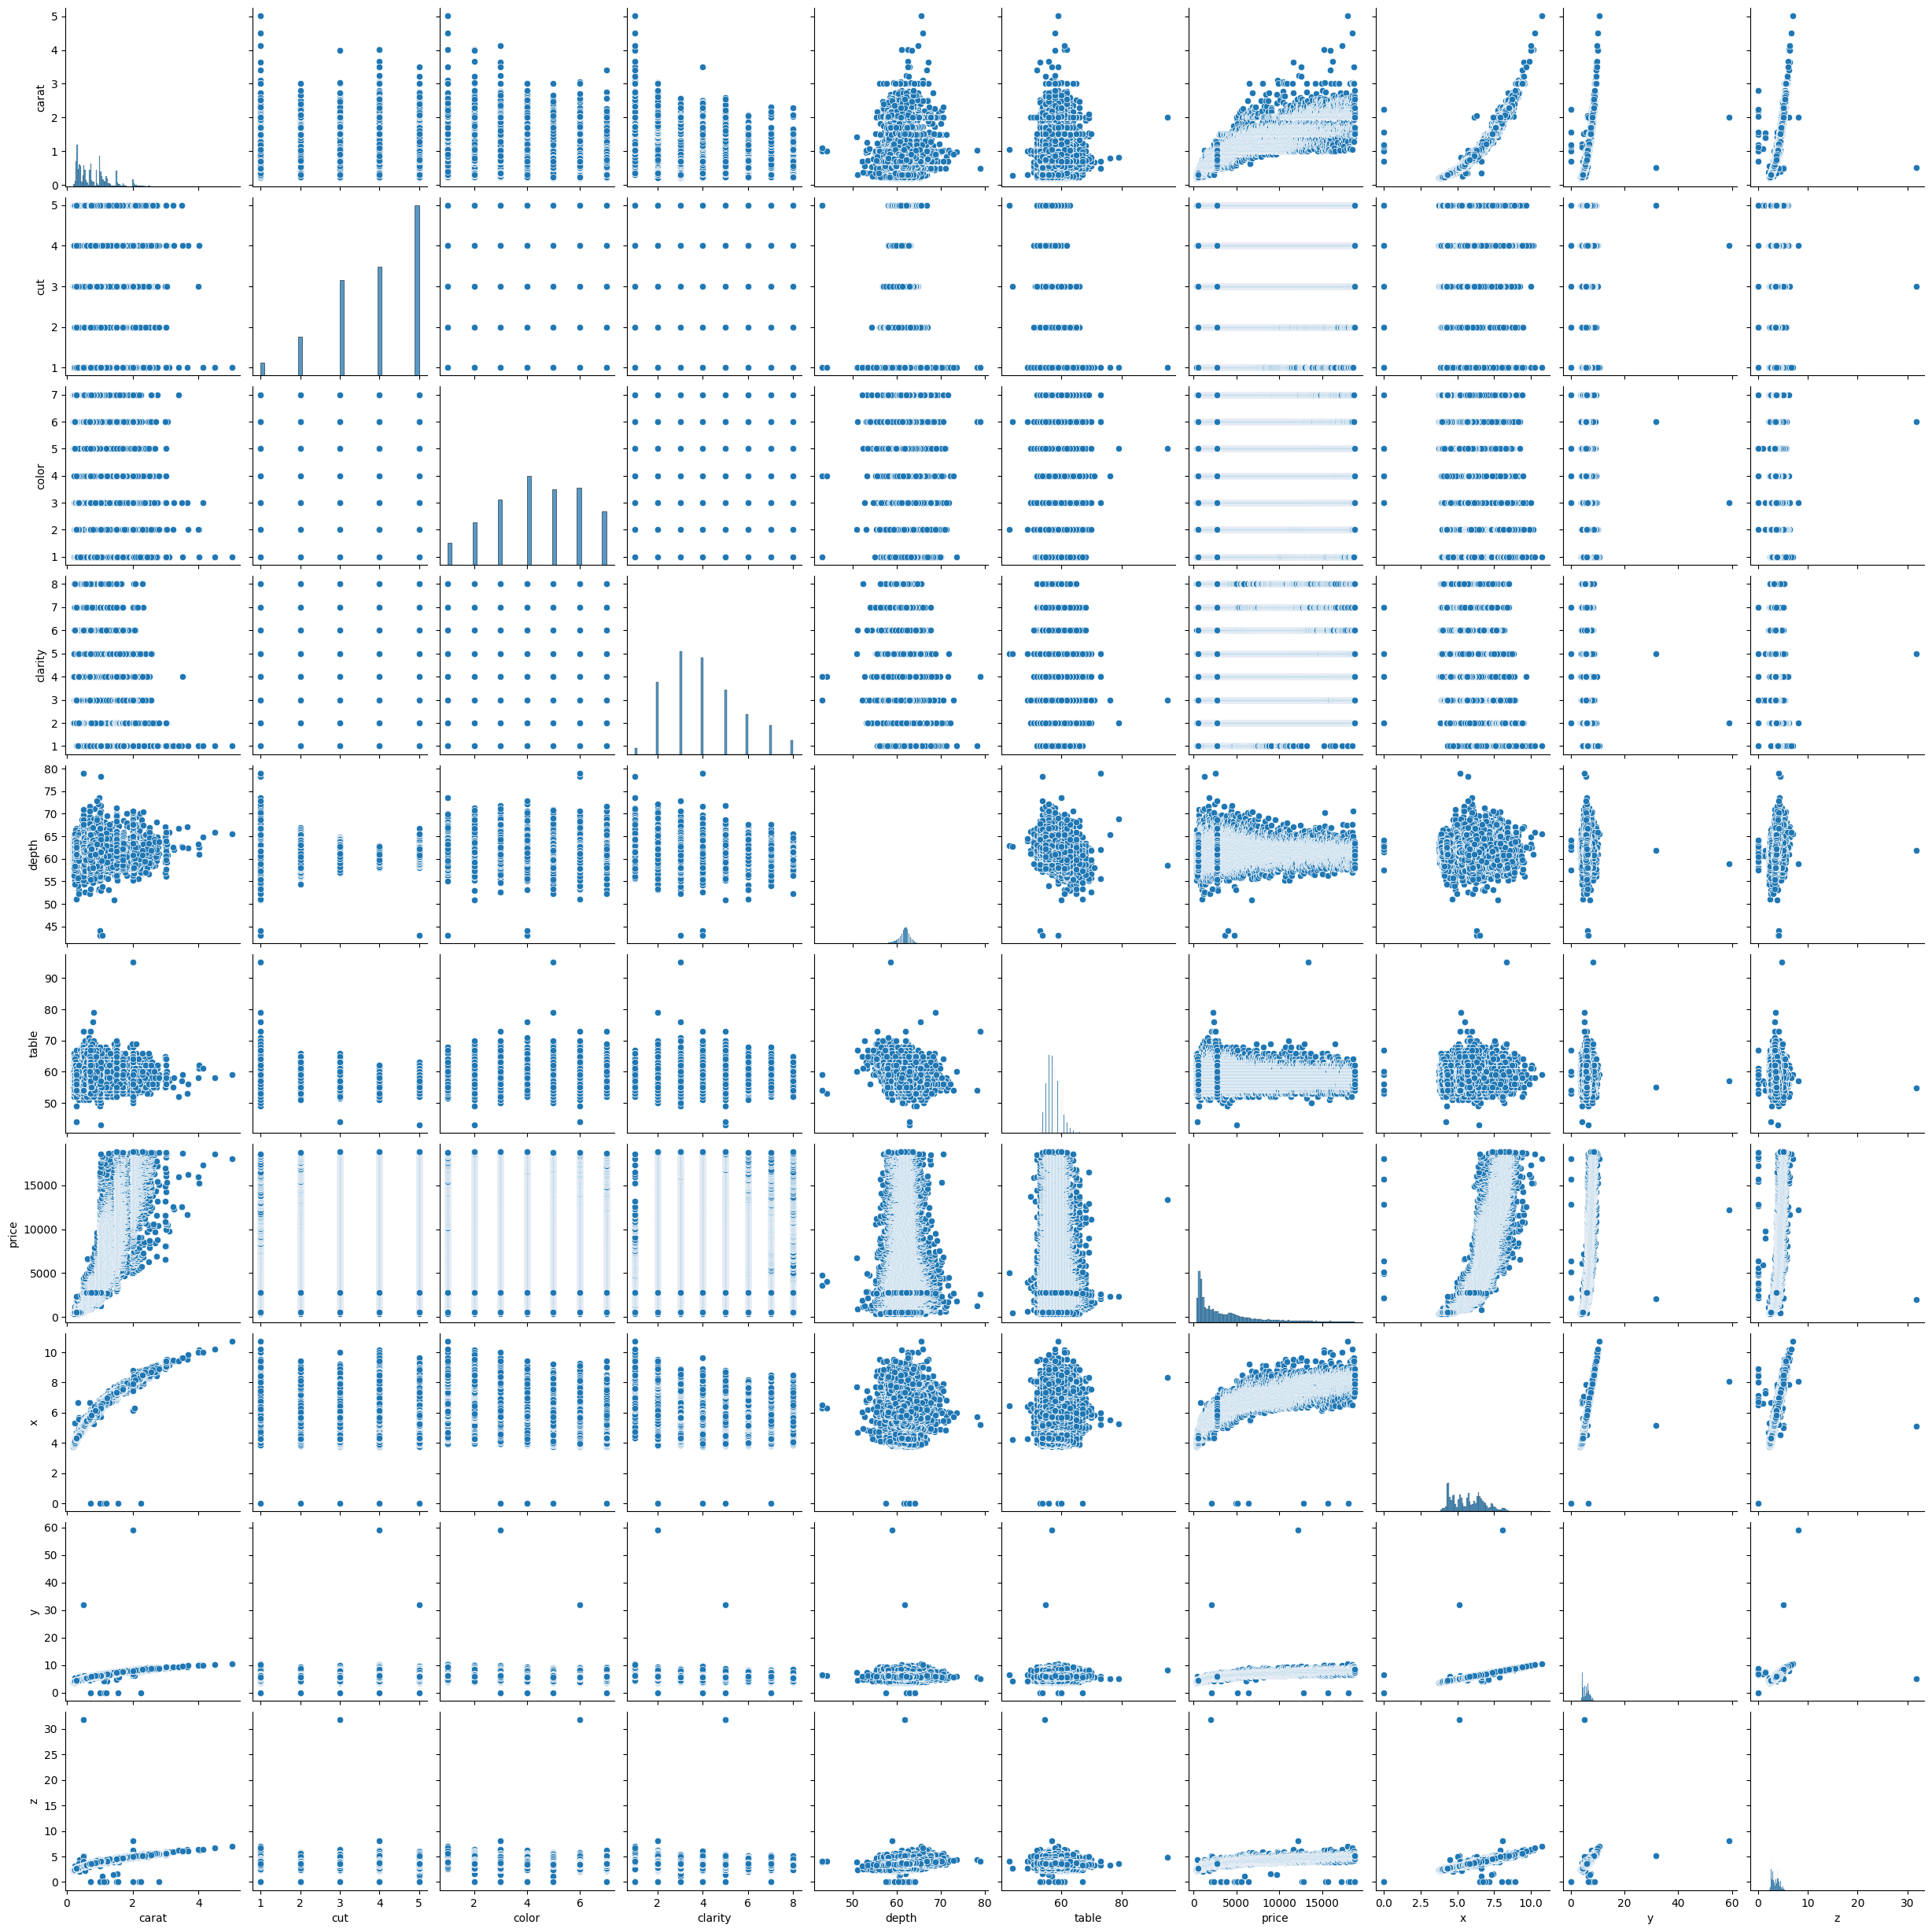

In [19]:
sns.pairplot(df)

## 5.3 Plot Graphs of Highly-Correlated Attributes vs. Target (Price)

**Carat vs. Price**

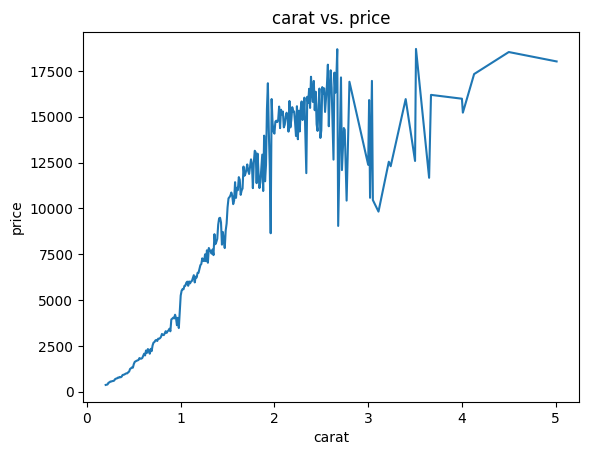

In [20]:
# line plot of carat vs price

price_vs_carat = sns.lineplot(x="carat", y="price", data=df, errorbar=None).set(title='carat vs. price')

Text(0.5, 1.0, 'carat vs. price')

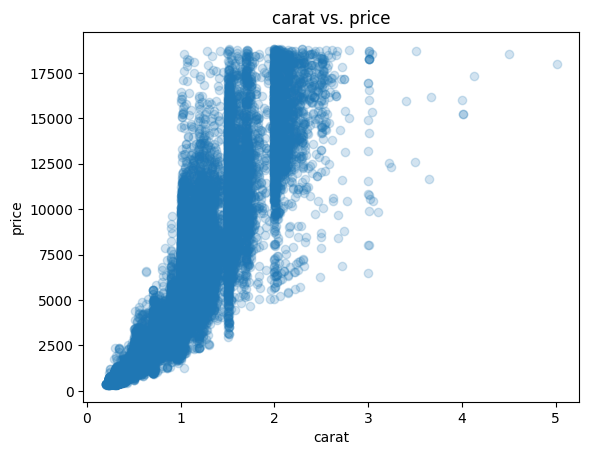

In [21]:
# Create a scatterplot of carat and price

X = df["carat"]
y = df["price"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, alpha=0.2)
plt.xlabel("carat")
plt.ylabel("price")
plt.title("carat vs. price")

**X Length vs. Price**

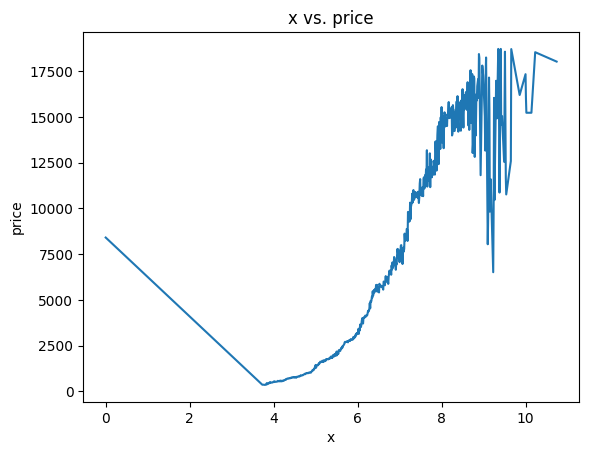

In [22]:
# line plot of price vs x

price_vs_x = sns.lineplot(x="x", y="price", data=df, errorbar=None).set(title='x vs. price')

(2.5, 11.0)

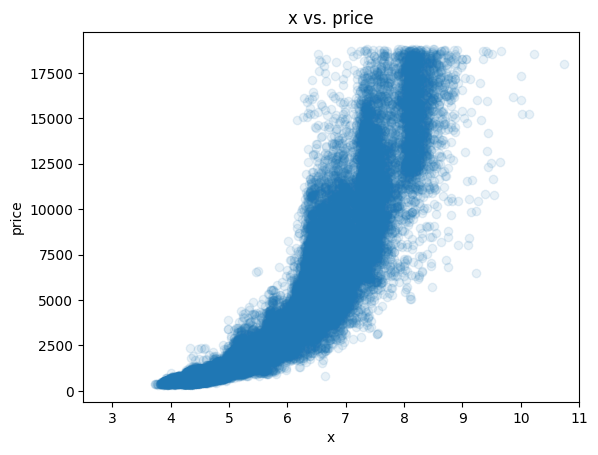

In [23]:
# Create a scatterplot of x and price

X = df["x"]
y = df["price"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, alpha = 0.1)
plt.xlabel("x")
plt.ylabel("price")
plt.title("x vs. price")

# zoom in the graph by limiting the x axis so that outliers are not dramatically scaling it
plt.xlim(2.5, 11)

**Y Length vs. Price**

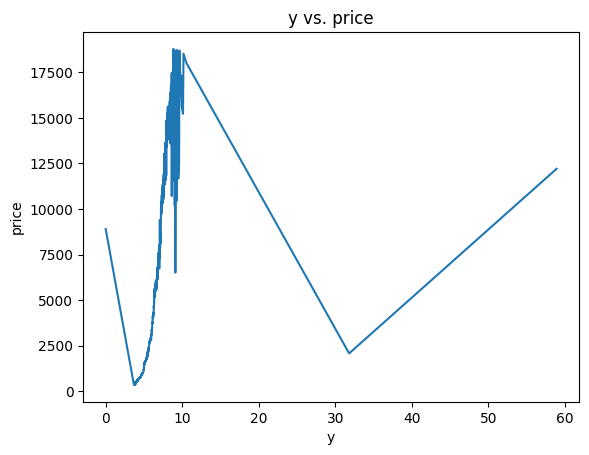

In [24]:
# line plot of y vs price
price_vs_y = sns.lineplot(x="y", y="price", data=df, errorbar=None).set(title='y vs. price')

(2.5, 11.0)

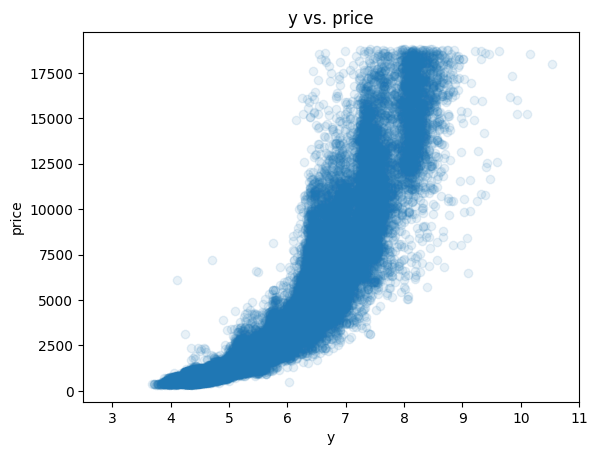

In [25]:
# Create a scatterplot of y and price

X = df["y"]
y = df["price"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, alpha = 0.1)
plt.xlabel("y")
plt.ylabel("price")
plt.title("y vs. price")

# zoom in the graph by limiting the x axis so that outliers are not dramatically scaling it
plt.xlim(2.5, 11)

**Z Length vs. Price**

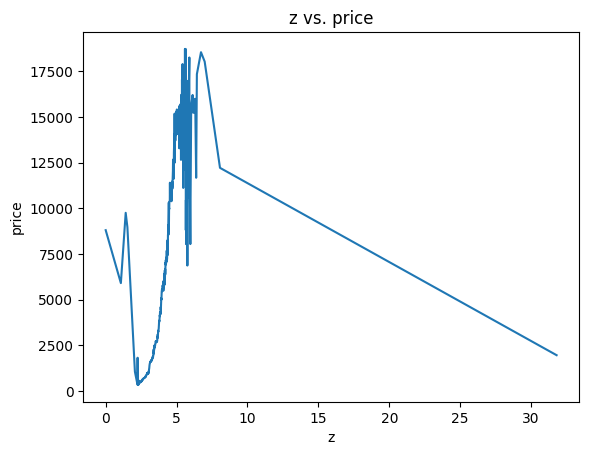

In [26]:
# line plot of z vs price
price_vs_z = sns.lineplot(x="z", y="price", data=df, errorbar=None).set(title='z vs. price')

(1.5, 7.5)

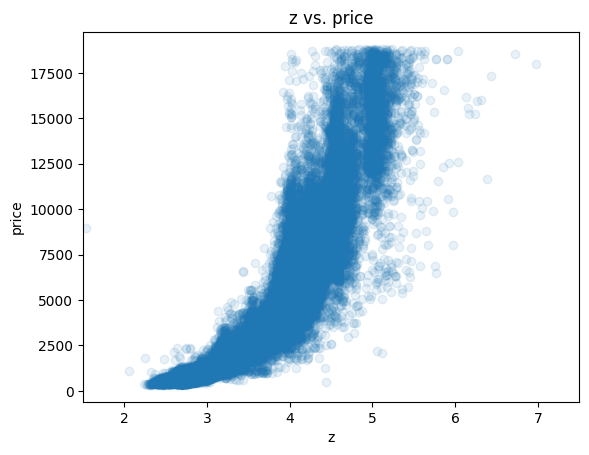

In [27]:
# Create a scatterplot of z and price

X = df["z"]
y = df["price"]
# Plot points
fig, pl = plt.subplots()
pl.scatter(X, y, alpha = 0.1)
plt.xlabel("z")
plt.ylabel("price")
plt.title("z vs. price")

# zoom in the graph by limiting the x axis so that outliers are not dramatically scaling it
plt.xlim(1.5, 7.5)

# Step 6: Clean and Prepare Data

## 6.1: Check for duplicates and remove them if any exist

In [28]:
# Check for duplicate rows and delete them

df.duplicated().sum()

146

In [29]:
df.drop_duplicates(inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


## 6.2: Handle Missing Values

In [30]:
# Find the number of missing values in each column

df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There appear to be no missing values. However, upon closer inspection it becomes clear that there are certain rows that have an X, Y, or Z length where the value is 0. These instances should be changed as a shape cannot have a dimension of 0. We will replace it with null for now, then fill them with the mean using the pipeline later on.

In [31]:
# Find the number of values that are 0

zero_length = (df == 0).sum()

# Print the count of missing values for each column
print(zero_length)

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          19
dtype: int64


In [32]:
# replace 0 with nan
df['x'] = df['x'].replace(0, np.nan)
df['y'] = df['y'].replace(0, np.nan)
df['z'] = df['z'].replace(0, np.nan)

df.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          19
dtype: int64

## 6.3: Handle Obvious Outliers
Inspecting the above graphs and table below, it is revealed that there are some outlier instances which may affect the averages of data. By checking the max values of 'Y' and 'Z', we see that there are some entries significantly greater than the mean. We will find how many entries are above a certain threshold and remove them.

In [33]:
df.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53787.000000,53788.000000,53775.000000
mean,0.79778,3.904134,4.406086,4.051920,61.748080,57.458109,3933.065082,5.731960,5.735293,3.539964
std,0.47339,1.116098,1.701117,1.646857,1.429909,2.233679,3988.114460,1.118859,1.139664,0.702017
min,0.20000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.40000,3.000000,3.000000,3.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,5.000000,6.000000,5.000000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [34]:
# count number of y values significantly greater than the mean (double)
y_outlier = (df['y'] > 11).sum()
y_outlier

2

In [35]:
# find the entries with these outliers
y_outlier_list = df[df['y'] > 11]
y_outlier_list

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,4,3,2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,5,6,5,61.8,55.0,2075,5.15,31.8,5.12


In [36]:
# count number of z values significantly greater than the mean (double)
z_outlier = (df['z'] > 10).sum()
z_outlier

1

In [37]:
# find the entries with these outliers
z_outlier_list = df[df['z'] > 10]
z_outlier_list

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,3,6,5,61.8,54.7,1970,5.12,5.15,31.8


It is highly likely that these outlier values are off by a factor of ten; potentially a typo when placing the decimal point. It is not realistic for a diamond to have a Y axis length of 58mm while its other two axis lengths are 8mm and its carat is only 2. Therefore, we will scale these outlier values down by a factor of ten.

In [38]:
df.loc[df['y']==58.9, 'y'] = 5.89

In [39]:
df.loc[df['y']==31.8, 'y'] = 3.18

y_outlier = (df['y'] > 11).sum()
y_outlier

0

In [40]:
df.loc[df['z']==31.8, 'z'] = 3.18

z_outlier = (df['z'] > 10).sum()
z_outlier

0

# 6.4: Create a Pipeline that will:
1. Fill in the missing numerical values with the mean using a SimpleImputer

2. Scale the numerical columns using StandardScaler (but not the target).

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [42]:
# Create the num columns
# Get a list of column names from df that are of numerical data types.

num_cols = df.select_dtypes(include='number').columns.to_list()

# Exclude the target from numerical columns
num_cols.remove("price")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols)], remainder='passthrough')

In [43]:
num_cols

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

In [44]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['carat', 'cut', 'color', 'clarity', 'depth',
                                  'table', 'x', 'y', 'z'])])

In [45]:
# Apply the preprocessing pipeline on the dataset

df_prepared = preprocessing.fit_transform(df)

# Add column headers back
feature_names=preprocessing.get_feature_names_out()
df_prepared = pd.DataFrame(data=df_prepared, columns=feature_names)

df_prepared

,num__carat,num__cut,num__color,num__clarity,num__depth,num__table,num__x,num__y,num__z,remainder__price
0,-1.199402,0.981881,0.936990,-1.245973,-0.173495,-1.100486,-1.592777,-1.579008,-1.605009,326.0
1,-1.241651,0.085894,0.936990,-0.638750,-1.362393,1.585691,-1.646407,-1.705057,-1.778612,326.0
2,-1.199402,-1.706079,0.936990,0.575696,-3.390512,3.376475,-1.503394,-1.497977,-1.778612,327.0
3,-1.072656,0.085894,-1.414429,-0.031527,0.455922,0.242603,-1.369319,-1.353921,-1.315670,334.0
4,-1.030407,-1.706079,-2.002284,-1.245973,1.085338,0.242603,-1.244182,-1.245880,-1.142067,335.0
...,...,...,...,...,...,...,...,...,...,...
53789,-0.164306,0.981881,1.524844,-0.638750,-0.663041,-0.205093,0.016124,0.023611,-0.057046,2757.0
53790,-0.164306,-1.706079,1.524844,-0.638750,0.945468,-1.100486,-0.037506,0.014608,0.102091,2757.0
53791,-0.206555,-0.810092,1.524844,-0.638750,0.735662,1.137995,-0.064321,-0.048417,0.029756,2757.0
53792,0.131436,0.085894,-0.826574,-1.245973,-0.523171,0.242603,0.373658,0.347737,0.290161,2757.0


In [46]:
df_prepared.columns

Index(['num__carat', 'num__cut', 'num__color', 'num__clarity', 'num__depth',
       'num__table', 'num__x', 'num__y', 'num__z', 'remainder__price'],
      dtype='object')

In [47]:
df_prepared.isna().sum()

num__carat          0
num__cut            0
num__color          0
num__clarity        0
num__depth          0
num__table          0
num__x              0
num__y              0
num__z              0
remainder__price    0
dtype: int64

# Step 7: Select Models and Train Them

## 7.1: Split the dataset into a training dataset (80%) and a testing dataset (20%)

In [48]:
from sklearn.model_selection import train_test_split

X = df_prepared.drop(["remainder__price"], axis=1)
y = df_prepared["remainder__price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(43035, 9) (43035,) (10759, 9) (10759,)


## 7.2: Train a Linear Regression Model

In [49]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train,y_train)

LinearRegression()

## 7.3: Test model on the test set and report MSE

In [50]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

1391121.1535805406

## 7.4: Train using KFold cross-validation with 5 folds

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

scores

array([-1494618.98276898, -1379324.62322029, -1545957.56889548,
       -1435205.72352564, -1572730.02521569])

## 7.5: Calculate the mean and standard deviation of the cross-validation scores

In [52]:
mean_score = -scores.mean()  # Take the negative value to get the mean squared error

print(f'Cross-Validation Mean Score: {mean_score}')

Cross-Validation Mean Score: 1485567.3847252172


## 7.6: Plot a graph for Linear Regression

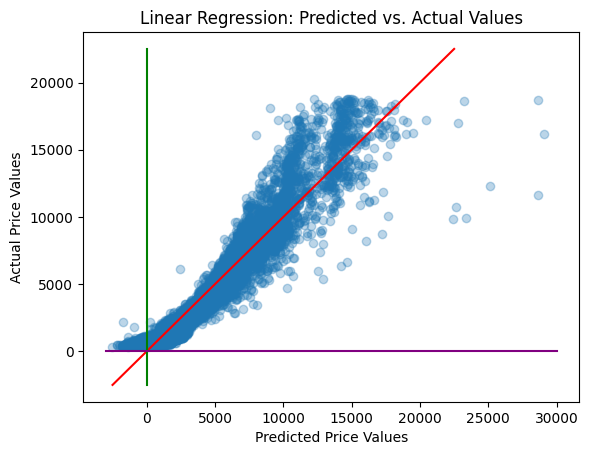

In [53]:
# plot graph of linear regression vs actual target

plt.scatter(lr_y_predict, y_test, alpha = 0.3) 

plt.plot([-2500, 22500], [-2500, 22500], color='red', label='y=x Line') # line to illustrate when predicted price = actual price
plt.plot([0, 0], [-2500, 22500], color='green', label='x=0 Line') # line to illustrate how some values were predicted to have negative price
plt.plot([-3000, 30000], [0, 0], color='purple', label='y=0 Line')

plt.xlabel("Predicted Price Values")
plt.ylabel("Actual Price Values")
plt.title("Linear Regression: Predicted vs. Actual Values")

plt.show()

# Step 8: Train with Ridge and Lasso Regression

## 8.1: Find the best alpha values for Ridge and Lasso Regression

In [54]:
from sklearn.linear_model import Ridge

min_ridge_mse = 99999999
min_ridge_alpha = -1

# find the lowest MSE score for ridge regression by testing alpha values of 0-9

for i in range(10):
    RidgeRegression = Ridge(alpha=i)
    ridge_model = RidgeRegression.fit(X_train, y_train)
    Ridge_y_predict = ridge_model.predict(X_test)
    ridge_mse = mse(y_test, Ridge_y_predict)
    print(f'Ridge Regression MSE where alpha = {i}: {ridge_mse}')
    if ridge_mse < min_ridge_mse:
        min_ridge_mse = ridge_mse
        min_ridge_alpha = i

print(f'Minimum Ridge Regression MSE where alpha = {min_ridge_alpha}: {min_ridge_mse}')
RidgeRegression = Ridge(alpha=min_ridge_alpha)
ridge_model = RidgeRegression.fit(X_train, y_train)
Ridge_y_predict = ridge_model.predict(X_test)

Ridge Regression MSE where alpha = 0: 1391121.1535805438
Ridge Regression MSE where alpha = 1: 1391056.5159773533
Ridge Regression MSE where alpha = 2: 1391005.309597867
Ridge Regression MSE where alpha = 3: 1390966.3756000872
Ridge Regression MSE where alpha = 4: 1390938.668182841
Ridge Regression MSE where alpha = 5: 1390921.2421699953
Ridge Regression MSE where alpha = 6: 1390913.2421217212
Ridge Regression MSE where alpha = 7: 1390913.8927646873
Ridge Regression MSE where alpha = 8: 1390922.4905640706
Ridge Regression MSE where alpha = 9: 1390938.3962864692
Minimum Ridge Regression MSE where alpha = 6: 1390913.2421217212


In [55]:
from sklearn.linear_model import Lasso

min_lasso_mse = 99999999
min_lasso_alpha = -1

# find the lowest MSE score for lasso regression by testing alpha values of 3-9
# alpha values of 0-2 gave warnings so I have not included them

for i in range(3,10):
    LassoRegression = Lasso(alpha=i)
    lasso_model = LassoRegression.fit(X_train, y_train)
    Lasso_y_predict = lasso_model.predict(X_test)
    lasso_mse = mse(y_test, Lasso_y_predict)
    print(f'Lasso Regression MSE where alpha = {i}: {lasso_mse}')
    if lasso_mse < min_lasso_mse:
        min_lasso_mse = lasso_mse
        min_lasso_alpha = i

print(f'Minimum Lasso Regression MSE where alpha = {min_lasso_alpha}: {min_lasso_mse}')
LassoRegression = Lasso(alpha=min_lasso_alpha)
lasso_model = LassoRegression.fit(X_train, y_train)
Lasso_y_predict = lasso_model.predict(X_test)

Lasso Regression MSE where alpha = 3: 1400633.8314987405
Lasso Regression MSE where alpha = 4: 1401576.5441889812
Lasso Regression MSE where alpha = 5: 1402723.0311063905
Lasso Regression MSE where alpha = 6: 1404073.9313940841
Lasso Regression MSE where alpha = 7: 1405628.1200380358
Lasso Regression MSE where alpha = 8: 1407386.3499297972
Lasso Regression MSE where alpha = 9: 1409348.8023865987
Minimum Lasso Regression MSE where alpha = 3: 1400633.8314987405


## 8.2: Plot a graph for the Ridge and Lasso Regression

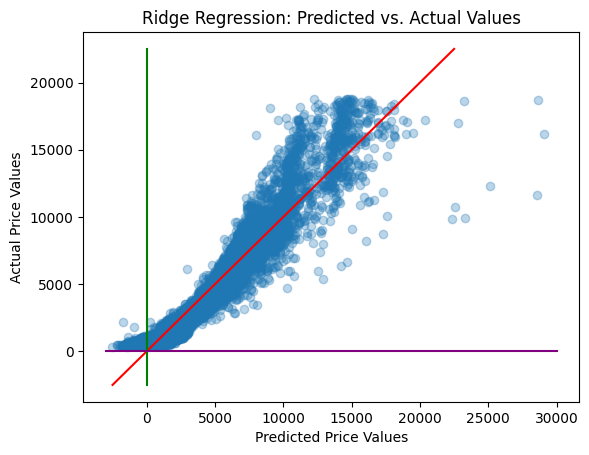

In [56]:
# plot graph of ridge regression vs actual target

plt.scatter(Ridge_y_predict, y_test, alpha = 0.3) 

plt.plot([-2500, 22500], [-2500, 22500], color='red', label='y=x Line') # line to illustrate when predicted price = actual price
plt.plot([0, 0], [-2500, 22500], color='green', label='x=0 Line') # line to illustrate how some values were predicted to have negative price
plt.plot([-3000, 30000], [0, 0], color='purple', label='y=0 Line')

plt.xlabel("Predicted Price Values")
plt.ylabel("Actual Price Values")
plt.title("Ridge Regression: Predicted vs. Actual Values")

plt.show()

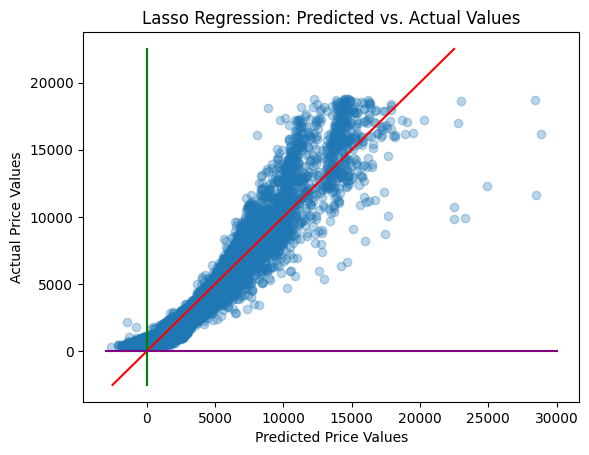

In [57]:
# plot graph of lasso regression vs actual target

plt.scatter(Lasso_y_predict, y_test, alpha = 0.3) 

plt.plot([-2500, 22500], [-2500, 22500], color='red', label='y=x Line') # line to illustrate when predicted price = actual price
plt.plot([0, 0], [-2500, 22500], color='green', label='x=0 Line') # line to illustrate how some values were predicted to have negative price
plt.plot([-3000, 30000], [0, 0], color='purple', label='y=0 Line')

plt.xlabel("Predicted Price Values")
plt.ylabel("Actual Price Values")
plt.title("Lasso Regression: Predicted vs. Actual Values")

plt.show()

# Step 9: Train a SVR Model

## 9.1: Run a model without any specified hyperparameters

In [58]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create an SVR model
svr_model = SVR()

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
svr_first_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_first_mse = mean_squared_error(y_test, svr_first_y_pred)
print(f'Mean Squared Error: {svr_first_mse}')

Mean Squared Error: 6970554.203120945


## 9.2: Plot a graph for initial findings

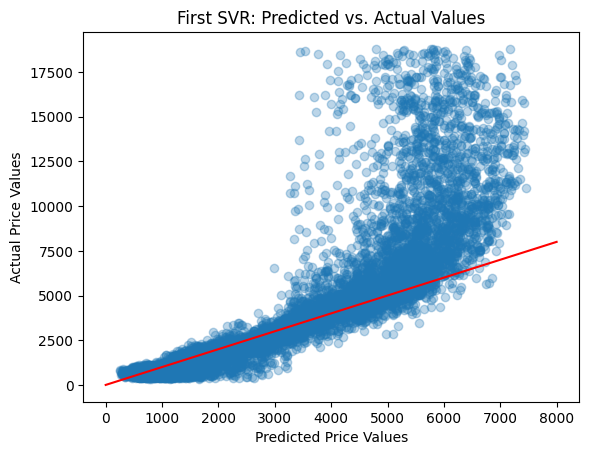

In [59]:
# plot graph of svr model

plt.scatter(svr_first_y_pred, y_test, alpha = 0.3)

plt.plot([0, 8000], [0, 8000], color='red', label='y=x Line') # line to illustrate when predicted price = actual price

plt.xlabel("Predicted Price Values")
plt.ylabel("Actual Price Values")
plt.title("First SVR: Predicted vs. Actual Values")


plt.show()

## 9.3: Find better hyperparameters
Clearly the SVR model has a much higher MSE than it should, so we will perform grid search with cross-validation to find hyperparameters that will improve its accuracy.

**IMPORTANT NOTE:** the code below has been commented out because it took **over four hours** for it to process. The output that was given suggested a rbf kernel with C=10 and epsilon=0.01 would be ideal. If you wish to conduct the processing yourself, uncomment the code.

In [60]:
# from sklearn.model_selection import GridSearchCV

# Define parameter grid
# param_grid = {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 0.5]}

# Perform grid search with cross-validation
# grid_search = GridSearchCV(SVR(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# Get the best model
# best_svr_model = grid_search.best_estimator_
# print(best_svr_model)

## 9.4: Run the model with the new hyperparameters

In [61]:
# Create an SVR model
svr_model = SVR(kernel='rbf', C=10, epsilon=0.01)

# Fit the model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test data
svr_second_y_pred = svr_model.predict(X_test)

# Evaluate the model
svr_second_mse = mean_squared_error(y_test, svr_second_y_pred)
print(f'Mean Squared Error: {svr_second_mse}')

Mean Squared Error: 1547281.3555625537


## 9.5: Plot a graph for the new model

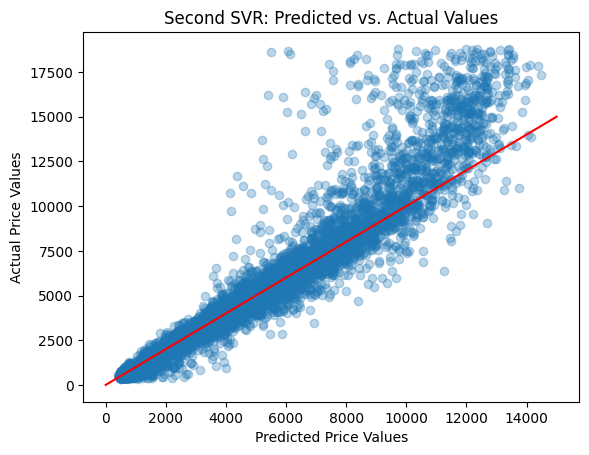

In [62]:
# plot a graph for svr model

plt.scatter(svr_second_y_pred, y_test, alpha = 0.3)  

plt.plot([0, 15000], [0, 15000], color='red', label='y=x Line') # line to illustrate when predicted price = actual price

plt.xlabel("Predicted Price Values")
plt.ylabel("Actual Price Values")
plt.title("Second SVR: Predicted vs. Actual Values")

plt.show()

# Step 10: Compare all methods

## 10.1: Compare MSE

In [63]:
# compare MSE's of all methods

print(f'Linear Regression MSE: {lr_mse}')
print(f'Cross-Validation Mean Score: {mean_score}')
print(f'Ridge Regression MSE: {min_ridge_mse}')
print(f'Lasso Regression MSE: {min_lasso_mse}')
print(f'Support Vector Regression MSE: {svr_second_mse}')

Linear Regression MSE: 1391121.1535805406
Cross-Validation Mean Score: 1485567.3847252172
Ridge Regression MSE: 1390913.2421217212
Lasso Regression MSE: 1400633.8314987405
Support Vector Regression MSE: 1547281.3555625537


In [64]:
# compare RMSE's of all methods

print(f'Linear Regression RMSE: {np.sqrt(lr_mse)}')
print(f'Cross-Validation Root Mean Score: {np.sqrt(mean_score)}')
print(f'Ridge Regression RMSE: {np.sqrt(min_ridge_mse)}')
print(f'Lasso Regression RMSE: {np.sqrt(min_lasso_mse)}')
print(f'Support Vector Regression RMSE: {np.sqrt(svr_second_mse)}')

Linear Regression RMSE: 1179.4579914437566
Cross-Validation Root Mean Score: 1218.8385392352907
Ridge Regression RMSE: 1179.3698495899075
Lasso Regression RMSE: 1183.4837690051945
Support Vector Regression RMSE: 1243.8976467388923


## 10.2: Two more graphs of Ridge Regression model

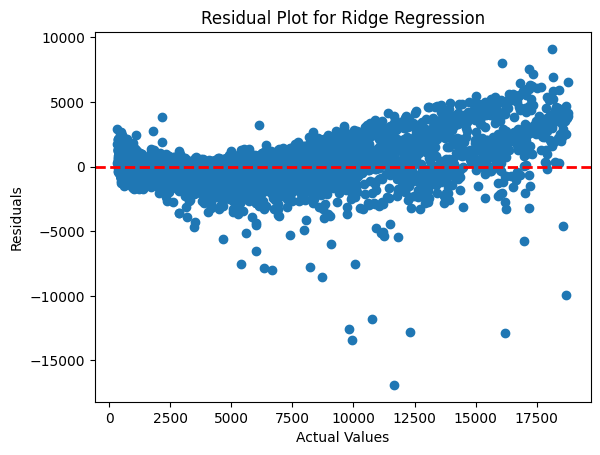

In [65]:
# Plot the residuals (the differences between predicted and actual values) against the actual values
# This plot helps identify patterns or trends in the errors.
residuals = y_test - Ridge_y_predict
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.show()

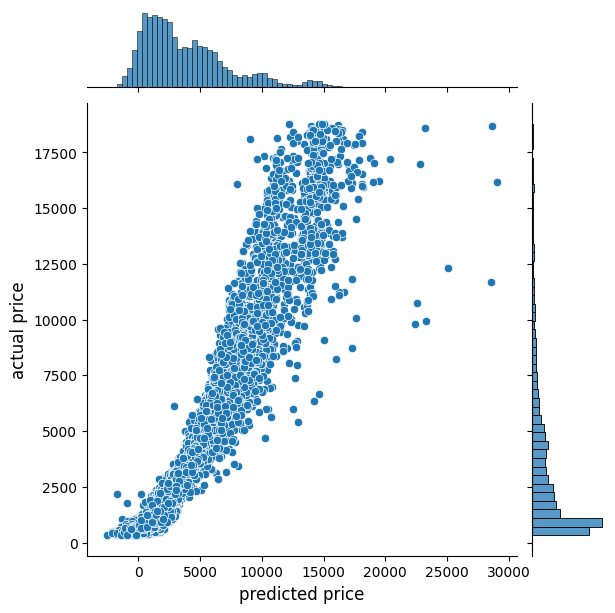

In [66]:
# create a scatter plot with histograms along the axes. 
# This provides a comprehensive view of the relationship between actual and predicted values.
sns.jointplot(x=Ridge_y_predict, y=y_test, kind='scatter').set_axis_labels('predicted price', 'actual price', fontsize=12)

# Findings:
Based on the above, it is clear that the Ridge Regression model is the best predictor of price based on the other attributes. However, the other models were not far off. Why, then, does every model seem to struggle estimating high cost diamonds when lower cost diamonds are predicted much more accurately? Looking at the KDE plot below, we can see that this dataset has significantly more low-cost diamonds than expensive ones. This means that the models have more training on the properties of cheaper diamonds and can therefore make better predictions on a cheap test diamond than it could on an expensive test diamond.

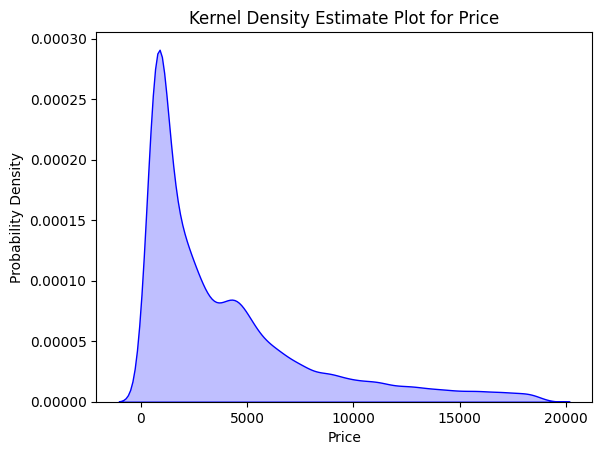

In [67]:
# Create a KDE plot for price
sns.kdeplot(df['price'], fill=True, color='blue')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Probability Density')
plt.title('Kernel Density Estimate Plot for Price')
plt.show()